In [1]:
from checkpoint import Checkpoint
checkpoint = Checkpoint("../trained_models/train1-for-testing", 1)

In [2]:
from train import TrainingManager
tm = TrainingManager(checkpoint, last_epoch=200)

C:\Users\Matej\Documents\seminar2\text-to-image\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Checkpoint loaded from: ..\trained_models\train1-for-testing.
	epoch: 200
	lr: {'discriminator': 0.0002, 'generator': 0.0002}


Loading train set: 200it [00:00, 1077.64it/s]


Using 9430 samples for train subset


Loading validation set: 200it [00:00, 1723.14it/s]


Using 0 samples for val subset


Loading test set: 200it [00:00, 1818.10it/s]

Using 2358 samples for test subset
{'image_root': 'C:\\Users\\Matej\\Documents\\CUB\\images', 'embeddings_root': 'C:\\Users\\Matej\\Documents\\CUB\\embeddings', 'data_split': [0.8, 0.0, 0.2], 'batch_size': 256, 'start_lr': 0.0002, 'patience': 5, 'factor': 0.99, 'num_epochs': 2500, 'l1_coef': 50, 'l2_coef': 100, 'real_label': 1.0, 'fake_label': 0.0, 'seed': 1234, 'device': 'cuda:0'}


In [3]:
tm.test()

Testing started on model trained for 335 epochs


Testing: 100%|██████████| 10/10 [00:16<00:00,  1.69s/it]

Discriminator test error: 1.91
Generator test error: 24.20


(1.9103974223136901, 24.204685974121094)

In [3]:
print(len(tm.losses["g_loss_train"]))

27750


In [12]:
import matplotlib.pyplot as plt

def plot_training_loss(loss_list, title="Training Loss per Iteration"):
    plt.figure(figsize=(10, 6))
    plt.plot(loss_list, label='Training Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_test_error(epochs, loss_list, title="loss"):
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss_list, label="Error")

    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()


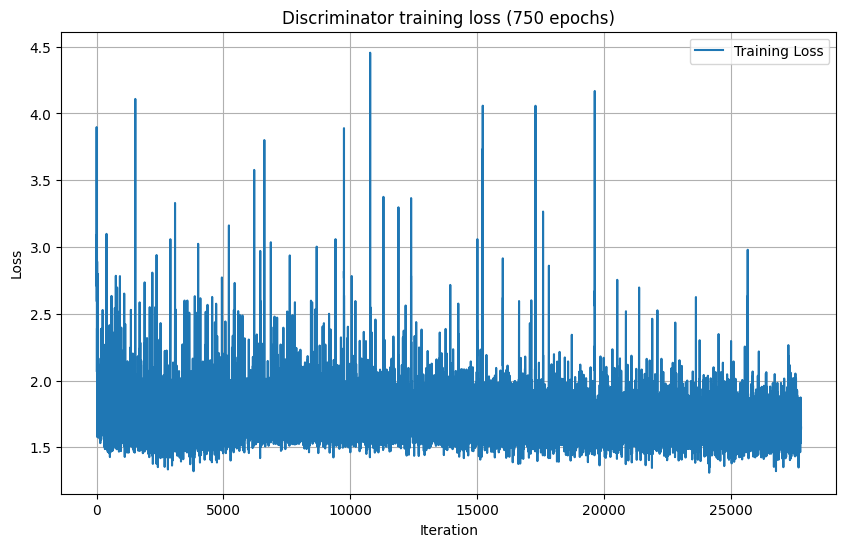

In [13]:
plot_training_loss(tm.losses["d_loss_train"], title="Discriminator training loss (750 epochs)")

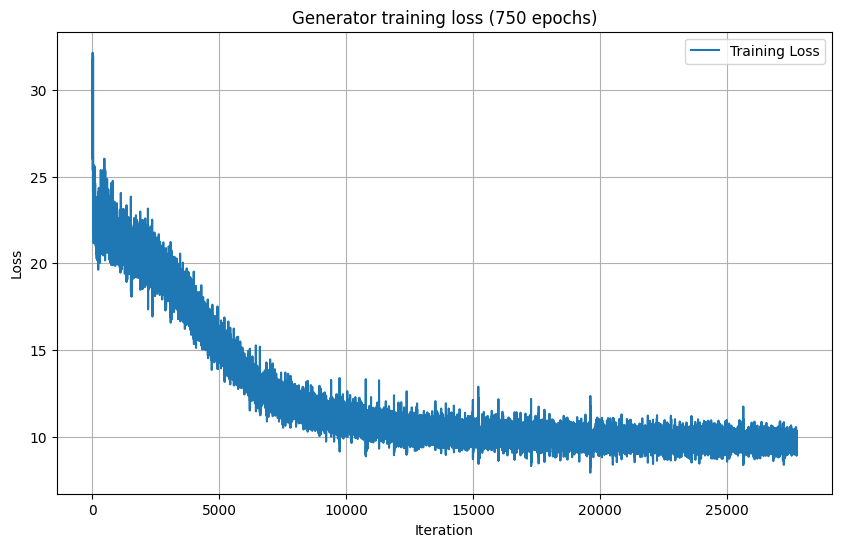

In [14]:
plot_training_loss(tm.losses["g_loss_train"], title="Generator training loss (750 epochs)")

In [15]:
import json
with open("../trained_models/train1-for-testing/test_losses.json", "r") as f:
    errors = json.load(f)

d_test_loss = [e[1] for e in errors]
g_test_loss = [e[2] for e in errors]
epochs = [e[0] for e in errors]

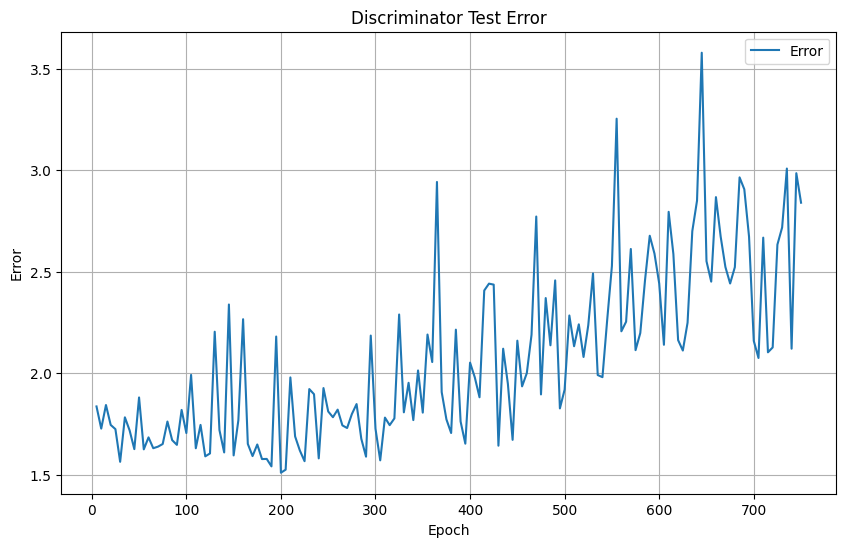

In [16]:
plot_test_error(epochs, d_test_loss, title="Discriminator Test Error")

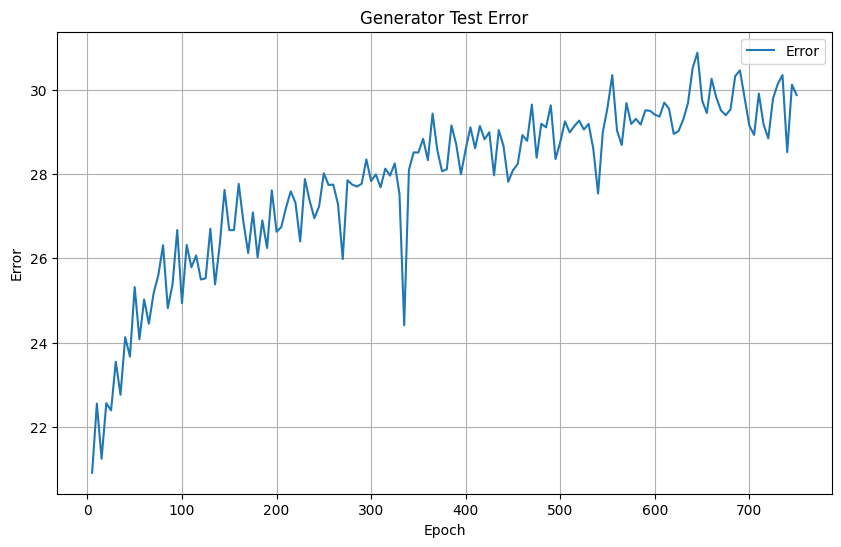

In [17]:
plot_test_error(epochs, g_test_loss, title="Generator Test Error")